In [12]:
import e2h
import netket as nk
import matplotlib.pyplot as plt
import numpy as np

samples = ['10', '100', '300', '500', '1000', '3000', '5000']
j2_vals = ['0.5']
cnn_file = "cnn_exact/j1_1_j2_{0}.wf"

meas = []
meas_11 = []
meas_11_sigma = []
meas_22 = []
meas_22_sigma = []
meas_sigma = []
recon_j2 = []
variance_recon = []
for j2 in j2_vals:
    for sample in samples:
        data = e2h.main(['python3 e2h.py', '4x4', '-machine_type', 'j1j2_exact', '-ops_dist', '2', '-ham_j2', j2, '-machine_from_file', cnn_file.format(j2), '-ops_symmetries', 'trans_x,trans_y,rot,su2', '-meas_wf_rotation', 'neel' if float(j2) <= 0.5 else 'striped', '-meas_batches', '1', '-meas_chains', '16', '-meas_discard_samples', '1', '-meas_samples', sample, '-ham_rotation', 'neel'])
        meas.append(data['measurements']['0,1']['Mean'])
        meas_sigma.append(data['measurements']['0,1']['Sigma'])
        meas_22.append(data['measurements']['1,1']['Mean'])
        meas_22_sigma.append(data['measurements']['1,1']['Sigma'])
        meas_11.append(data['measurements']['0,0']['Mean'])
        meas_11_sigma.append(data['measurements']['0,1']['Sigma'])
        recon_j2.append(data['eigens'][0]['h'][1] / data['eigens'][0]['h'][0])
        variance_recon.append(data['eigens'][0]['variance'])
        
print(data['measurements']['0,1'])

*** This configuration is called g7565j3rfpwyazuaecnf4jypuv3z2ww2eqau2vaootqrl3yeq66q
*** [2-site SU2 (0,1) (1,0), 2-site SU2 (-1,1) (1,1)]
*** Configuration:  {'mpi_threads': 1, 'threading_index': None, 'threading_total': None, 'machine_seed': None, 'machine_sigma': None, 'machine_type': 'j1j2_exact', 'machine_fc_hidden_factor': None, 'machine_rbms_alpha': None, 'machine_from_file': 'cnn_exact/j1_1_j2_0.5.wf', 'machine_j1j2_c4': None, 'machine_j1j2_rot_type': None, 'exact_eigens': None, 'sampler_seed': 4321, 'geom_from_file': None, 'geom_len_x': 4, 'geom_len_y': 4, 'geom_pb_x': True, 'geom_pb_y': True, 'geom_rot_sym': False, 'ham_j2': 0.5, 'ham_rotation': 'neel', 'ops_symmetries': 'trans_x,trans_y,rot,su2', 'ops_discard': 'one_site', 'ops_dist': 2, 'ops_only_aniso': 0, 'opt_discard_samples': None, 'opt_learning_rate': None, 'opt_samples': None, 'opt_diag_shift': None, 'opt_method': None, 'opt_iters': None, 'opt_batches': None, 'meas_batches': 1, 'meas_chains': 16, 'meas_discard_sample

*** 2 operators with 192 terms total
*** found existing run data
*** loading training wf
*** skipping finding exact wf
*** converting observables...
*** that took 0.0 s
*** skipping MC measurements
*** skipping exact measurements
*** measured energy: -33.777424672246575
*** diagonalizing covariance...
*** that took 0.0 s
*** -- ΔH0: 1.0287596034681457
*** ---- H0:
*** 0.8963342623572029 * 2-site SU2 (0,1) (1,0) (D = -0.0019070713572870712)
*** 0.44337894641555664 * 2-site SU2 (-1,1) (1,1) (D = 0.003834649084401287)
*** -- ΔH1: 367.6375013811905
*** ---- H1:
*** 0.44337894641555664 * 2-site SU2 (0,1) (1,0) (D = 0.4510482445843592)
*** -0.8963342623572029 * 2-site SU2 (-1,1) (1,1) (D = 1.343547857857161)
*** variance of exact hamiltonian with Q: 1.0354837102883045
*** variance of best hamiltonian with Q: 1.0287596034681457
*** variance of exact hamiltonian with MC: 0.004719921483899817
*** rejection of h0 onto subspace of best eigenvectors has norm 0.004282682647598776
*** projection of 

*** This configuration is called buhhzrpg6cn3iaadrzcbw5oh45meaedojn7kkui7lsgv6y7ikx7q
*** [2-site SU2 (0,1) (1,0), 2-site SU2 (-1,1) (1,1)]
*** Configuration:  {'mpi_threads': 1, 'threading_index': None, 'threading_total': None, 'machine_seed': None, 'machine_sigma': None, 'machine_type': 'j1j2_exact', 'machine_fc_hidden_factor': None, 'machine_rbms_alpha': None, 'machine_from_file': 'cnn_exact/j1_1_j2_0.5.wf', 'machine_j1j2_c4': None, 'machine_j1j2_rot_type': None, 'exact_eigens': None, 'sampler_seed': 4321, 'geom_from_file': None, 'geom_len_x': 4, 'geom_len_y': 4, 'geom_pb_x': True, 'geom_pb_y': True, 'geom_rot_sym': False, 'ham_j2': 0.5, 'ham_rotation': 'none', 'ops_symmetries': 'trans_x,trans_y,rot,su2', 'ops_discard': 'one_site', 'ops_dist': 2, 'ops_only_aniso': 0, 'opt_discard_samples': None, 'opt_learning_rate': None, 'opt_samples': None, 'opt_diag_shift': None, 'opt_method': None, 'opt_iters': None, 'opt_batches': None, 'meas_batches': 1, 'meas_chains': 16, 'meas_discard_sample

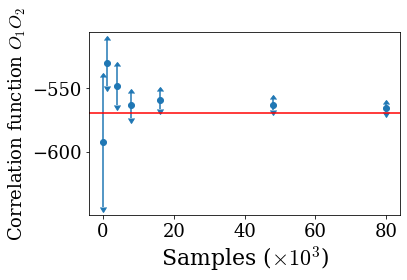

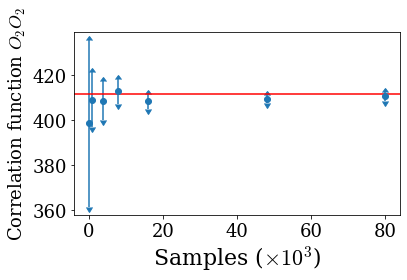

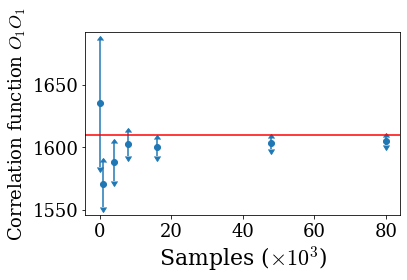

In [13]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
import matplotlib
matplotlib.rc('font', **font)
matplotlib.rc('mathtext', fontset='cm')

data_exact = e2h.main(['python3 e2h.py', '4x4', '-machine_type', 'j1j2_exact', '-ops_dist', '2', '-ham_j2', j2, '-machine_from_file', cnn_file.format('0.5'), '-meas_full_sample', '1', '-meas_full_sample_sym_c4', '1', '-meas_full_sample_sym_t', '1', '-ops_symmetries', 'trans_x,trans_y,rot,su2', '-meas_wf_rotation', 'neel' if float(j2) <= 0.5 else 'striped'])


plt.figure(figsize=[6, 4])
plt.xlabel("Samples ($\\times 10^3$)", fontsize=22)
plt.ylabel("Correlation function $O_1O_2$")
plt.errorbar([int(x)*16//1000 for x in samples], np.array(meas), yerr=meas_sigma, uplims=True, lolims=True, ls='none', marker='o')
plt.axhline(data_exact['measurements']['0,1']['Mean'], color="red")
plt.tight_layout()
plt.savefig("/mnt/z/Users/Kevin/Pictures/ex4.1.png", dpi=300)

plt.figure(figsize=[6, 4])
plt.xlabel("Samples ($\\times 10^3$)", fontsize=22)
plt.ylabel("Correlation function $O_2O_2$")
plt.errorbar([int(x)*16//1000 for x in samples], np.array(meas_22), yerr=meas_22_sigma, uplims=True, lolims=True, ls='none', marker='o')
plt.axhline(data_exact['measurements']['1,1']['Mean'], color="red")
plt.tight_layout()

plt.figure(figsize=[6, 4])
plt.xlabel("Samples ($\\times 10^3$)", fontsize=22)
plt.ylabel("Correlation function $O_1O_1$")
plt.errorbar([int(x)*16//1000 for x in samples], np.array(meas_11), yerr=meas_11_sigma, uplims=True, lolims=True, ls='none', marker='o')
plt.axhline(data_exact['measurements']['0,0']['Mean'], color="red")
plt.tight_layout()

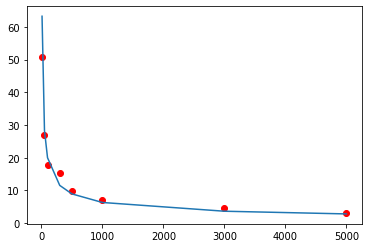

In [49]:
samples = np.array([int(x) for x in samples])
plt.plot(samples, np.array(meas_sigma), 'ro')
plt.plot(samples, 200 / np.sqrt(samples) )

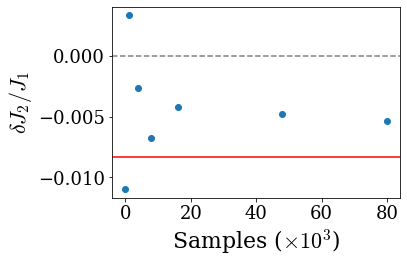

In [9]:

plt.figure(figsize=[6, 4])
plt.xlabel("Samples ($\\times 10^3$)", fontsize=22)
plt.ylabel("$\\delta J_2/J_1$", fontsize=22)
plt.plot([int(x)*16//1000 for x in samples], np.array(recon_j2) - 0.5, 'o')
plt.axhline(data_exact['eigens'][0]['h'][1] / data_exact['eigens'][0]['h'][0] - 0.5, color="red")
plt.axhline(0, color="gray", ls='--')
plt.tight_layout()
plt.savefig("/mnt/z/Users/Kevin/Pictures/ex4.2.png", dpi=300)

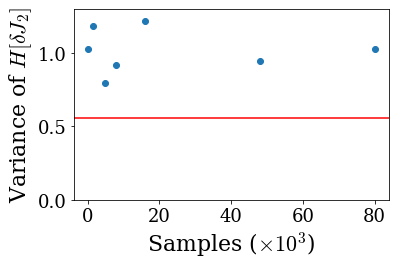

In [11]:

plt.figure(figsize=[6, 4])
plt.xlabel("Samples ($\\times 10^3$)", fontsize=22)
plt.ylabel("Variance of $H[\\delta J_2]$", fontsize=22)
plt.plot([int(x)*16/1000 for x in samples], variance_recon, 'o')
plt.axhline(data_exact['eigens'][0]['variance'], color='red')
plt.ylim([0, 1.3])
plt.tight_layout()
plt.savefig("/mnt/z/Users/Kevin/Pictures/ex4.3.png", dpi=300)